In [46]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [47]:
#load the dataset
df = pd.read_csv('listings.csv')

# Exploratory Data Analysis

In [48]:
# Check the first entries of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2115.0,Bed and breakfast in Como,2313,Helen,NaN,SOUTH PERTH,-32.006570,115.865150,Private room,140,1,132,29/5/2023,1.02,1,148,59,NaN
1,59311.0,Home in Perth,284743,Rudy And Lina,NaN,GOSNELLS,-32.076280,115.932000,Private room,65,1,7,28/4/2018,0.05,1,362,0,NaN
2,65261.0,Guest suite in Fremantle,319052,Suzanne Elizabeth,NaN,FREMANTLE,-32.047880,115.764180,Entire home/apt,70,2,310,3/6/2023,2.13,1,151,36,NaN
3,69534.0,Bed and breakfast in Perth,348191,Teresa,NaN,JOONDALUP,-31.842950,115.804670,Private room,120,3,12,19/12/2022,0.17,1,227,2,NaN
4,88185.0,Home in Perth,474393,Anne,NaN,VINCENT,-31.942358,115.858208,Private room,75,2,218,19/6/2023,1.47,2,84,19,NaN


In [49]:
df.shape

(11507, 18)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11507 non-null  float64
 1   name                            11507 non-null  object 
 2   host_id                         11507 non-null  int64  
 3   host_name                       11507 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   11507 non-null  object 
 6   latitude                        11507 non-null  float64
 7   longitude                       11507 non-null  float64
 8   room_type                       11507 non-null  object 
 9   price                           11507 non-null  int64  
 10  minimum_nights                  11507 non-null  int64  
 11  number_of_reviews               11507 non-null  int64  
 12  last_review                     

In [61]:
# change 'last_reviews' data types from object to datetime
df['last_review'] = pd.to_datetime(df['last_review'], dayfirst = True)

In [52]:
# Checking null value
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               11507
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        1080
reviews_per_month                  1080
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           11507
dtype: int64

 'neighbourhood_group' and 'license' are empty columns

In [53]:
# consider 92 listings are inactive which is less the 1 % of the dataset. I will keep them in the analysis.  

df[(df['last_review'].isnull()) & 
   (df['reviews_per_month'].isnull()) &  
   (df['number_of_reviews'] == 0) & 
   (df['availability_365']== 0)].count()

id                                92
name                              92
host_id                           92
host_name                         92
neighbourhood_group                0
neighbourhood                     92
latitude                          92
longitude                         92
room_type                         92
price                             92
minimum_nights                    92
number_of_reviews                 92
last_review                        0
reviews_per_month                  0
calculated_host_listings_count    92
availability_365                  92
number_of_reviews_ltm             92
license                            0
dtype: int64

In [54]:
# Check duplicate values
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license


In [55]:
# Check distinct host listings
df['host_id'].value_counts()

host_id
511967       126
55410179      99
425993564     92
106486177     82
15360130      79
73686458      74
157230313     66
153678208     64
34477031      64
8766429       59
40750914      59
103272197     55
27074418      53
111898575     52
29664529      41
100820345     37
269664436     35
235809812     33
159388704     31
156970925     31
444536982     30
99804294      30
6202448       30
20505466      30
215985827     29
11168796      29
40000631      28
138068839     28
39887389      28
22742955      28
154923957     27
86613607      27
34983497      27
304422664     26
165362413     26
33703497      25
180370437     24
157442856     24
90523633      23
267106440     23
14820023      23
99590132      22
132578883     21
9822545       21
368837332     20
134036526     20
109757750     20
5373199       20
117379039     19
224230796     19
98388145      19
130089108     19
26980735      19
374813241     19
183111856     19
218442462     19
115257197     17
80668501      17
128078

In [56]:
# Calculate the value counts
value_counts = df['host_id'].value_counts()

# Filter for counts greater than 1
counts_greater_than_one = value_counts[value_counts > 1]

# Calculate the percentage
percentage = (counts_greater_than_one.sum() / len(df)) * 100

print(f"The percentage of hosts who have listings more than 1 is: {percentage:.2f}%")


The percentage of hosts who have listings more than 1 is: 57.35%


In [57]:
# Check distinct areas of listings
areas = df['neighbourhood'].nunique()
print(f'There are {areas} areas listed in WA')

There are 112 areas listed in WA


In [58]:
# Check listings areas counts in descending order
area_counts = df.groupby('neighbourhood').size()
area_counts.sort_values(ascending= False)

neighbourhood
BUSSELTON                 1560
AUGUSTA-MARGARET RIVER     884
STIRLING                   676
FREMANTLE                  552
MANDURAH                   503
PERTH                      493
ALBANY                     382
JOONDALUP                  310
WANNEROO                   260
BROOME                     253
BELMONT                    245
DENMARK                    231
VINCENT                    231
GINGIN                     218
MELVILLE                   204
COCKBURN                   188
NORTHAMPTON                185
SOUTH PERTH                178
ROCKINGHAM                 177
ESPERANCE                  173
GREATER GERALDTON          165
VICTORIA PARK              162
KALGOORLIE-BOULDER         161
EXMOUTH                    160
MANJIMUP                   155
CANNING                    153
SWAN                       153
SUBIACO                    151
COTTESLOE                  144
BAYSWATER                  131
BUNBURY                    122
DANDARAGAN               

In [59]:
df['room_type'].value_counts()

room_type
Entire home/apt    9515
Private room       1900
Hotel room           61
Shared room          31
Name: count, dtype: int64

In [ ]:
df['room_type'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'     

Entire home/apt    82.7%
Private room       16.5%
Hotel room          0.5%
Shared room         0.3%
Name: room_type, dtype: object

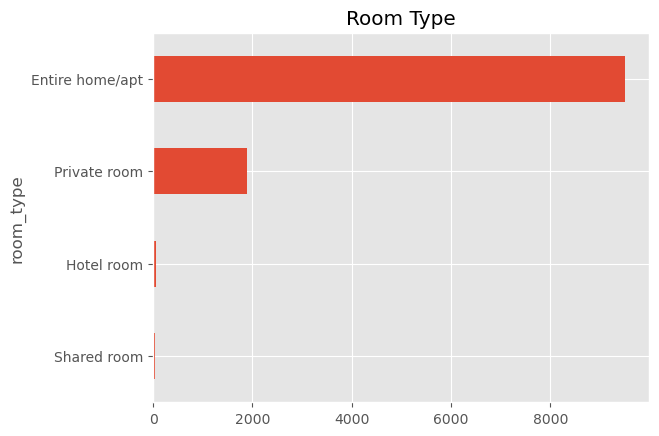

In [65]:
df['room_type'].value_counts().plot(kind = 'barh', title = 'Room Type').invert_yaxis() # descending orlder


In [27]:
df['price'].mean()

264.2543669071

In [67]:
df.groupby('room_type')['price'].mean().round(2)

room_type
Entire home/apt    289.56
Hotel room         210.70
Private room       141.93
Shared room        100.35
Name: price, dtype: float64

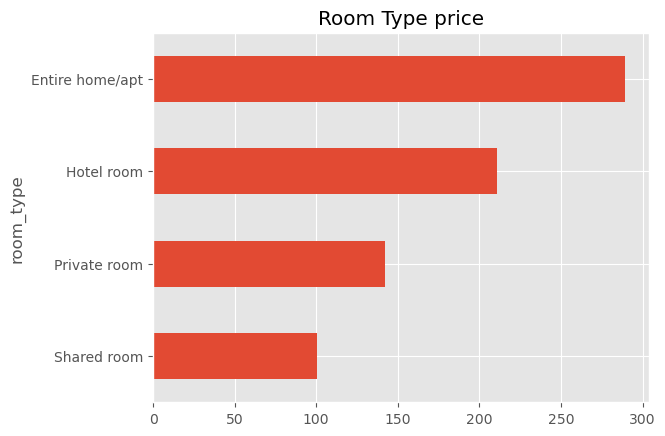

In [64]:
df.groupby('room_type')['price'].mean().plot(kind = 'barh', title = 'Room Type price').invert_yaxis()